#Q1

Accuracy of SVM with Linear Kernel: 1.00
Accuracy of SVM with RBF Kernel: 1.00


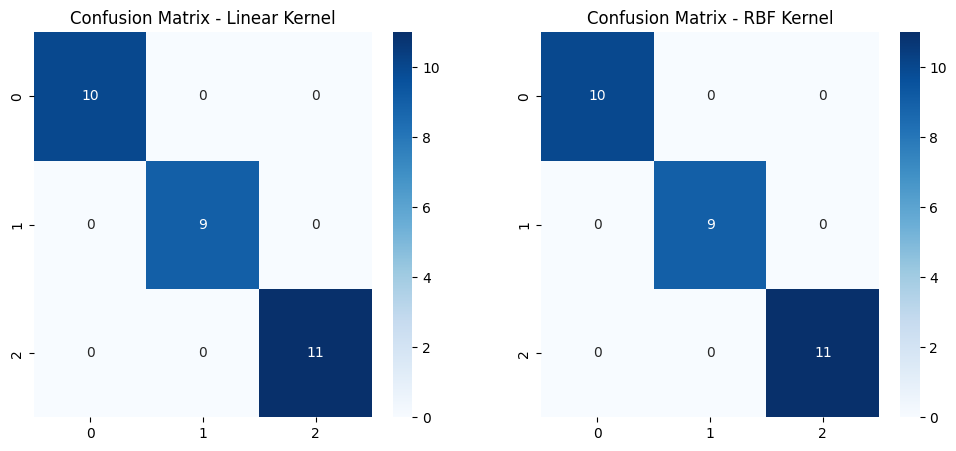

In [3]:
# Import necessary libraries
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# URL of the Iris dataset (adjust this URL if needed)
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Column names as the dataset contains headers now
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

# Load the dataset from the URL into a pandas DataFrame
iris = pd.read_csv(url, header=None, names=columns)

# Map the species names to numeric values (for classification)
iris['species'] = iris['species'].map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})

# Split features and target
X = iris.drop('species', axis=1)
y = iris['species']

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train SVM with a linear kernel
svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(X_train, y_train)

# Predict and calculate accuracy for the linear kernel model
y_pred_linear = svm_linear.predict(X_test)
accuracy_linear = accuracy_score(y_test, y_pred_linear)
conf_matrix_linear = confusion_matrix(y_test, y_pred_linear)

# Initialize and train SVM with RBF kernel
svm_rbf = SVC(kernel='rbf', random_state=42)
svm_rbf.fit(X_train, y_train)

# Predict and calculate accuracy for the RBF kernel model
y_pred_rbf = svm_rbf.predict(X_test)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
conf_matrix_rbf = confusion_matrix(y_test, y_pred_rbf)

# Display accuracy scores
print(f"Accuracy of SVM with Linear Kernel: {accuracy_linear:.2f}")
print(f"Accuracy of SVM with RBF Kernel: {accuracy_rbf:.2f}")

# Plot confusion matrices for both models
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Linear Kernel Confusion Matrix
sns.heatmap(conf_matrix_linear, annot=True, fmt="d", cmap="Blues", xticklabels=iris['species'].unique(),
            yticklabels=iris['species'].unique(), ax=axes[0])
axes[0].set_title('Confusion Matrix - Linear Kernel')

# RBF Kernel Confusion Matrix
sns.heatmap(conf_matrix_rbf, annot=True, fmt="d", cmap="Blues", xticklabels=iris['species'].unique(),
            yticklabels=iris['species'].unique(), ax=axes[1])
axes[1].set_title('Confusion Matrix - RBF Kernel')

plt.show()


#Q2

Accuracy Score with Linear Kernel: 0.8545


<Figure size 1000x800 with 0 Axes>

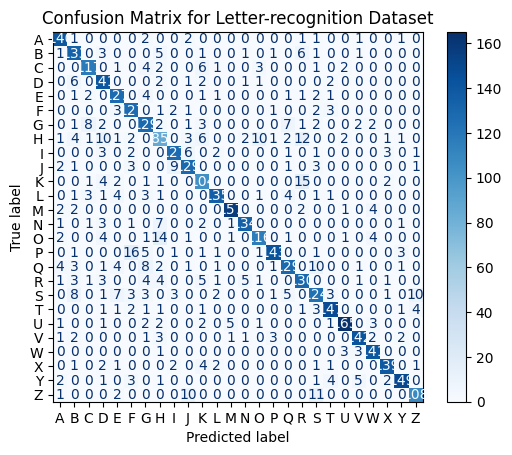

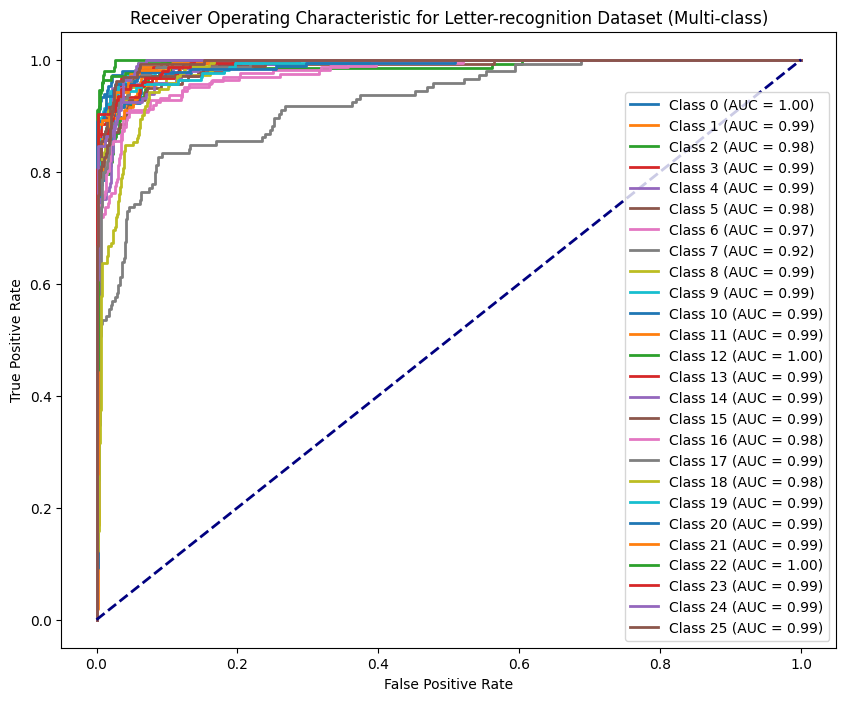

AUC score for Class 0: 0.9955
AUC score for Class 1: 0.9896
AUC score for Class 2: 0.9825
AUC score for Class 3: 0.9938
AUC score for Class 4: 0.9915
AUC score for Class 5: 0.9825
AUC score for Class 6: 0.9742
AUC score for Class 7: 0.9238
AUC score for Class 8: 0.9888
AUC score for Class 9: 0.9925
AUC score for Class 10: 0.9864
AUC score for Class 11: 0.9908
AUC score for Class 12: 0.9973
AUC score for Class 13: 0.9918
AUC score for Class 14: 0.9855
AUC score for Class 15: 0.9909
AUC score for Class 16: 0.9766
AUC score for Class 17: 0.9882
AUC score for Class 18: 0.9779
AUC score for Class 19: 0.9893
AUC score for Class 20: 0.9906
AUC score for Class 21: 0.9934
AUC score for Class 22: 0.9979
AUC score for Class 23: 0.9931
AUC score for Class 24: 0.9936
AUC score for Class 25: 0.9934


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import label_binarize

# Load the Letter-recognition dataset
letter_data = pd.read_csv('letter-recognition.csv')

# Prepare the dataset
X_letter = letter_data.drop('letter', axis=1)
y_letter = letter_data['letter']

# Encode the letter labels to numerical values
le = LabelEncoder()
y_letter_encoded = le.fit_transform(y_letter)

# Split the data into training and testing sets (80% training, 20% testing)
X_train_letter, X_test_letter, y_train_letter, y_test_letter = train_test_split(X_letter, y_letter_encoded, test_size=0.2, random_state=42)

# Train the SVM model with a linear kernel
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train_letter, y_train_letter)

# Make predictions
y_pred_letter = svm_linear.predict(X_test_letter)

# Calculate accuracy score
accuracy = accuracy_score(y_test_letter, y_pred_letter)
print(f"Accuracy Score with Linear Kernel: {accuracy:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_letter, y_pred_letter)

# Plot Confusion Matrix (without printing the elements)
plt.figure(figsize=(10, 8))  # Make the plot larger
ConfusionMatrixDisplay(conf_matrix, display_labels=le.classes_).plot(cmap='Blues')
plt.title('Confusion Matrix for Letter-recognition Dataset')
plt.show()

# Binarize the labels for multi-class classification
y_test_letter_binarized = label_binarize(y_test_letter, classes=np.arange(26))  # 26 classes
y_pred_prob_letter = svm_linear.decision_function(X_test_letter)

# Compute ROC curve and AUC score for each class
fpr = {}
tpr = {}
roc_auc = {}
for i in range(26):  # 26 classes
    fpr[i], tpr[i], _ = roc_curve(y_test_letter_binarized[:, i], y_pred_prob_letter[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for i in range(26):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Letter-recognition Dataset (Multi-class)')
plt.legend(loc="lower right")
plt.show()

# Display AUC scores for each class
for i in range(26):
    print(f"AUC score for Class {i}: {roc_auc[i]:.4f}")


<ipython-input-13-cbe5b0fcaae6>:23: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)  # Stripping spaces from data


Accuracy of the model: 0.93


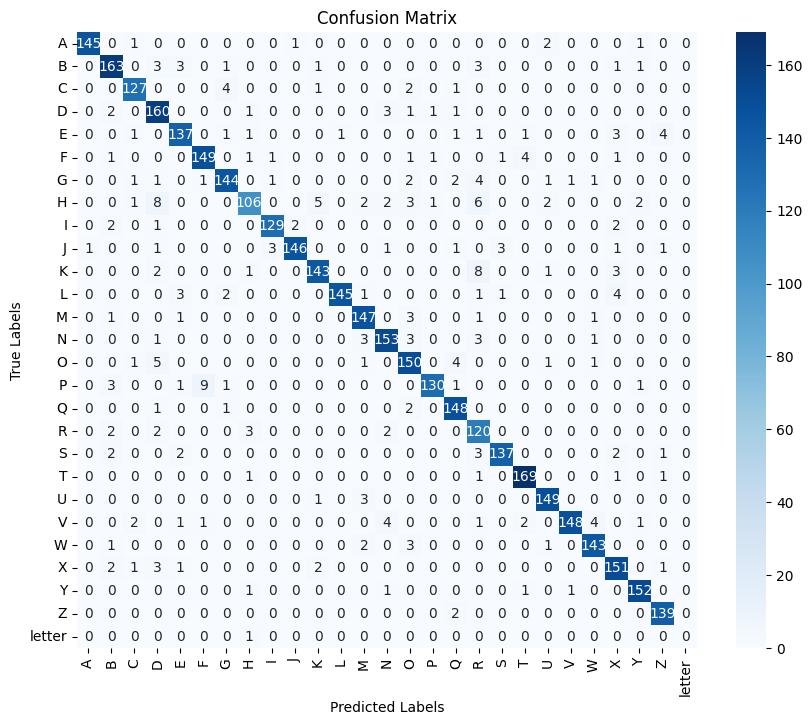

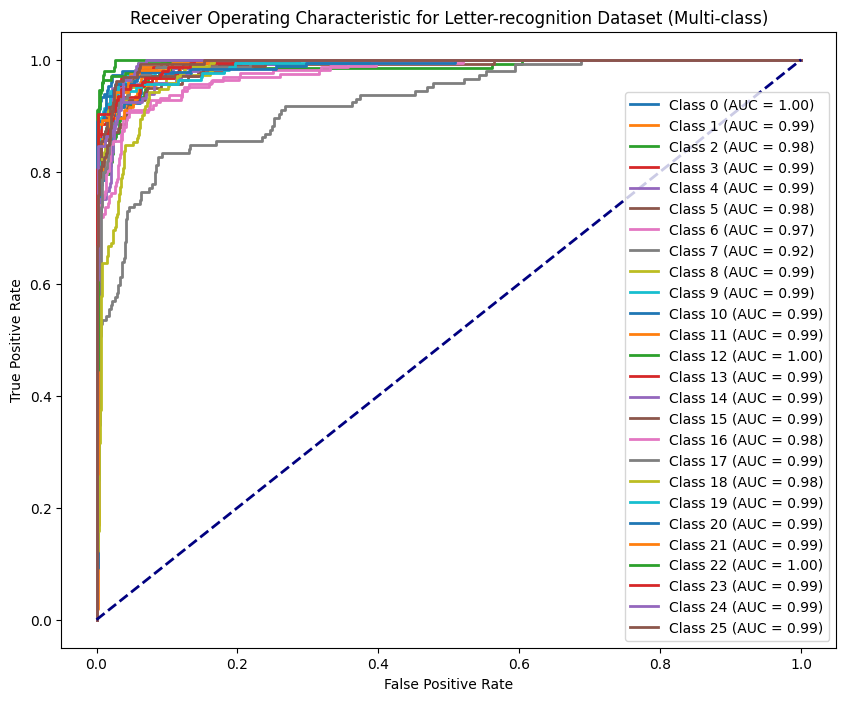

AUC score for Class 0: 0.9955
AUC score for Class 1: 0.9896
AUC score for Class 2: 0.9825
AUC score for Class 3: 0.9938
AUC score for Class 4: 0.9915
AUC score for Class 5: 0.9825
AUC score for Class 6: 0.9742
AUC score for Class 7: 0.9238
AUC score for Class 8: 0.9888
AUC score for Class 9: 0.9925
AUC score for Class 10: 0.9864
AUC score for Class 11: 0.9908
AUC score for Class 12: 0.9973
AUC score for Class 13: 0.9918
AUC score for Class 14: 0.9855
AUC score for Class 15: 0.9909
AUC score for Class 16: 0.9766
AUC score for Class 17: 0.9882
AUC score for Class 18: 0.9779
AUC score for Class 19: 0.9893
AUC score for Class 20: 0.9906
AUC score for Class 21: 0.9934
AUC score for Class 22: 0.9979
AUC score for Class 23: 0.9931
AUC score for Class 24: 0.9936
AUC score for Class 25: 0.9934


In [13]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.multiclass import OneVsRestClassifier
import numpy as np

# Load the Letter-recognition dataset (update the file path if needed)
url = "letter-recognition.csv"
columns = ['letter', 'xbox', 'ybox', 'width', 'height', 'onpix', 'xbar', 'ybar', 'x2bar', 'y2bar', 'xybar', 'x2ybar', 'xy2bar', 'xedge', 'xedgey', 'yedge', 'yedgex']

# Load the dataset
df = pd.read_csv(url, header=None, names=columns)

# Strip any extra spaces in column names
df.columns = df.columns.str.strip()

# Check if there are any extra spaces or non-numeric values in the feature columns
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)  # Stripping spaces from data

# Encode the 'letter' column (target) using LabelEncoder
le = LabelEncoder()
df['letter'] = le.fit_transform(df['letter'])

# Features and target
X = df.drop('letter', axis=1)
y = df['letter']  # This should now be a 1D array of labels

# Check if any column still contains non-numeric data
# We will use pd.to_numeric() with errors='coerce' to ensure all columns are numeric
X = X.apply(pd.to_numeric, errors='coerce')

# Handle missing values by filling with the mean of each column (optional)
X = X.fillna(X.mean())

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize the SVM classifier with RBF kernel
svm_rbf = OneVsRestClassifier(SVC(kernel='rbf', random_state=42, probability=True))

# Train the model
svm_rbf.fit(X_train, y_train)

# Predict on the test data
y_pred = svm_rbf.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the model: {accuracy:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Compute ROC curve and AUC score for each class
fpr = {}
tpr = {}
roc_auc = {}
for i in range(26):  # 26 classes
    fpr[i], tpr[i], _ = roc_curve(y_test_letter_binarized[:, i], y_pred_prob_letter[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for i in range(26):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Letter-recognition Dataset (Multi-class)')
plt.legend(loc="lower right")
plt.show()

# Display AUC scores for each class
for i in range(26):
    print(f"AUC score for Class {i}: {roc_auc[i]:.4f}")


#Q3

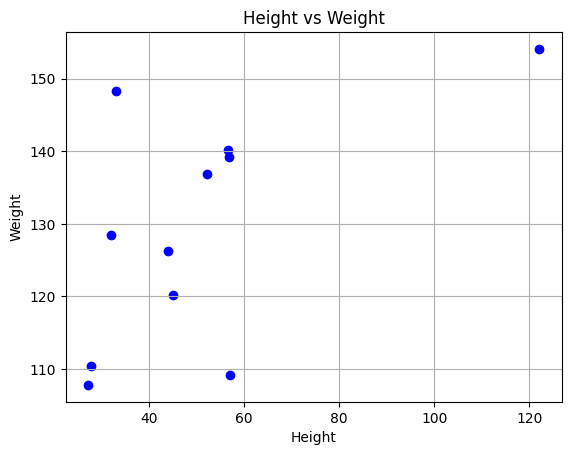

Support Vectors: [0 1 2 3 4 5 6 7]
R² score (accuracy) of the model: 0.1785
Root Mean Squared Error (RMSE): 11.6802


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Data
data = {
    "Height": [44, 52.1, 57.1, 33, 27.8, 27.2, 32, 45.1, 56.7, 56.9, 122.1],
    "Weight": [126.3, 136.9, 109.2, 148.3, 110.4, 107.8, 128.4, 120.2, 140.2, 139.2, 154.1]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Save to CSV
df.to_csv('height_weight_data.csv', index=False)

# Load the data from CSV
df = pd.read_csv('height_weight_data.csv')

# Plotting the data
plt.scatter(df['Height'], df['Weight'], color='blue', label='Data points')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Height vs Weight')
plt.grid(True)
plt.show()

# Define features and target
X = df[['Height']]  # Feature: Height
y = df['Weight']  # Target: Weight

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the model
svr = SVR(kernel='linear')

# Fit the model
svr.fit(X_train, y_train)

# Predict on the test set
y_pred = svr.predict(X_test)

# Calculate R² score (accuracy for regression)
r2 = r2_score(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5  # Root Mean Squared Error

# Print the results
print(f"Support Vectors: {svr.support_}")
print(f"R² score (accuracy) of the model: {r2:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
